# Data Preprocessing and creating Eigen Images with PCA

<b>Import required libraries<b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image

%matplotlib inline

<b>Load previously saved pickle dataset<b>

In [2]:
import pickle

In [4]:
df = pickle.load(open('./Data/Dataframe_images_100_100.pickle','rb'))

In [5]:
df.head()

,Gender,0,1,2,3,4,5,6,7,8,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,Male,106,100,81,69,71,48,51,55,41,...,17,18,26,28,31,30,31,29,31,31
1,Male,106,100,81,69,71,48,51,55,41,...,17,18,26,28,31,30,31,29,31,31
2,Male,106,100,81,69,71,48,51,55,41,...,17,18,26,28,31,30,31,29,31,31
3,Male,106,100,81,69,71,48,51,55,41,...,17,18,26,28,31,30,31,29,31,31
4,Male,106,100,81,69,71,48,51,55,41,...,17,18,26,28,31,30,31,29,31,31


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5444 entries, 0 to 6052
Columns: 10001 entries, Gender to 9999
dtypes: object(1), uint8(10000)
memory usage: 52.0+ MB


<b>Checking for missing values<b>

In [11]:
df.isnull().sum()

Gender    0
0         0
1         0
2         0
3         0
         ..
9995      0
9996      0
9997      0
9998      0
9999      0
Length: 10001, dtype: int64

<b>Removing missing values<b>

In [12]:
df.dropna(axis=0,inplace=True)

In [13]:
df.isnull().sum()

Gender    0
0         0
1         0
2         0
3         0
         ..
9995      0
9996      0
9997      0
9998      0
9999      0
Length: 10001, dtype: int64

<b>Split Data into Dependant and Independant variables<b>

In [14]:
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [15]:
X.shape, y.shape

((5444, 10000), (5444,))

In [16]:
X.min(), X.max()

(4, 227)

<b>Normalizing data<b>

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
X

array([[106, 100,  81, ...,  29,  31,  31],
       [106, 100,  81, ...,  29,  31,  31],
       [106, 100,  81, ...,  29,  31,  31],
       ...,
       [106, 100,  81, ...,  29,  31,  31],
       [106, 100,  81, ...,  29,  31,  31],
       [106, 100,  81, ...,  29,  31,  31]], dtype=uint8)

In [23]:
X_norm = (X-X.min())/(X.max()-X.min())

In [24]:
X_norm

array([[0.4573991 , 0.43049327, 0.34529148, ..., 0.11210762, 0.12107623,
        0.12107623],
       [0.4573991 , 0.43049327, 0.34529148, ..., 0.11210762, 0.12107623,
        0.12107623],
       [0.4573991 , 0.43049327, 0.34529148, ..., 0.11210762, 0.12107623,
        0.12107623],
       ...,
       [0.4573991 , 0.43049327, 0.34529148, ..., 0.11210762, 0.12107623,
        0.12107623],
       [0.4573991 , 0.43049327, 0.34529148, ..., 0.11210762, 0.12107623,
        0.12107623],
       [0.4573991 , 0.43049327, 0.34529148, ..., 0.11210762, 0.12107623,
        0.12107623]])

In [26]:
X_norm.shape

(5444, 10000)

In [27]:
y

array(['Male', 'Male', 'Male', ..., 'Female', 'Female', 'Female'],
      dtype=object)

In [28]:
y_enc = np.where(y=='Male',0,1)

In [29]:
y_enc

array([0, 0, 0, ..., 1, 1, 1])

<b>Save X and y in numpy zip<b>

In [31]:
np.savez('./Data/Data_norm.npz', X_norm,y_enc)

<b>Loading Data<b>

In [32]:
from glob import glob

In [33]:
data = np.load('./Data/Data_norm.npz')

In [34]:
data.files

['arr_1', 'arr_0']

In [35]:
X_comp = data['arr_0']#Independent features
y_comp = data['arr_1']#target value

In [43]:
X_comp.shape

(5444, 10000)

In [44]:
y_comp.shape

(5444,)

<b>Create Eigen Images<b>

In [54]:
X1 = abs(X_comp - X_comp.mean(axis=0))

In [55]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(n_components=None,whiten=True,svd_solver='auto')

In [42]:
x_pca =pca.fit_transform(X1)

e:\users\user.desktop-3hhgvth\anaconda3\envs\opencv\lib\site-packages\sklearn\decomposition\_pca.py:456: RuntimeWarning: invalid value encountered in true_divide
  explained_variance_ratio_ = explained_variance_ / total_var


In [45]:
x_pca.shape

(5444, 5444)

In [46]:
eigen_ratio = pca.explained_variance_ratio_
eigen_ratio_cum = np.cumsum(eigen_ratio)

In [51]:
'''plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(eigen_ratio[:200], 'r>--')
plt.subplot(1,2,2)
plt.plot(eigen_ratio_cum[:200], 'r>--')'''

"plt.figure(figsize=(10,4))\nplt.subplot(1,2,1)\nplt.plot(eigen_ratio[:200], 'r>--')\nplt.subplot(1,2,2)\nplt.plot(eigen_ratio_cum[:200], 'r>--')"

<b>Forming Eigen images with 50 components<b>

In [56]:
pca_50 = PCA(n_components=50,whiten=True)

In [57]:
x_pca_50 = pca_50.fit_transform(X1)

e:\users\user.desktop-3hhgvth\anaconda3\envs\opencv\lib\site-packages\sklearn\decomposition\_pca.py:545: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ / total_var.sum()


In [58]:
x_pca_50.shape

(5444, 50)

<b>Save PCA using pickle<b>

In [59]:
import pickle

In [60]:
pickle.dump(pca_50,open('./Model/pca_50.pickle','wb'))

In [61]:
x_pca_inv = pca_50.inverse_transform(x_pca_50)

In [62]:
x_pca_inv.shape

(5444, 10000)

<b>Check output for a single Image<b>

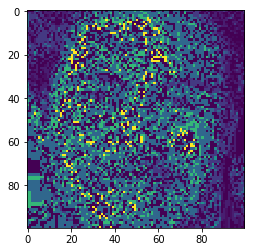

In [63]:
eig_img = x_pca_inv[0,:]
eig_img = eig_img.reshape(100,100)
plt.imshow(eig_img)

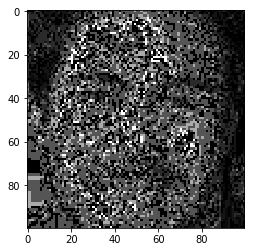

In [64]:
plt.imshow(eig_img,cmap='gray')

<b>Save Data<b>

In [65]:
np.savez('./Data/Data_pca_50_y_mean.pickle',x_pca_50,y_comp,X.mean())

<b>Load Data and remove warnings<b>

In [66]:
import warnings
warnings.filterwarnings('ignore')

In [68]:
final_data = np.load('./Data/Data_pca_50_y_mean.pickle.npz')

In [69]:
final_data.files

['arr_1', 'arr_0', 'arr_2']